## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [1]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd
import torchvision.transforms as transforms

importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 17m 12s
The preloaded images use 0.140716552734375MB of memory


LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 71.38%
Class: capot_roto, #470, 28.62%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.5956 Main metric (macro_f1): 0.4171 Time: 58.94s
test Loss: 0.5857 Main metric (macro_f1): 0.4475 Time: 6.55s
Epoch 1/99
----------
train Loss: 0.5590 Main metric (macro_f1): 0.4520 Time: 56.70s
test Loss: 0.5616 Main metric (macro_f1): 0.5089 Time: 7.07s
ES Module Best: 0.561621998698966, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5242 Main metric (macro_f1): 0.5361 Time: 61.45s
test Loss: 0.5498 Main metric (macro_f1): 0.4837 Time: 6.88s
ES Module Best: 0.5497842784066802, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.4910 Main metric (macro_f1): 0.6257 Time: 45.47s
test Loss: 0.5295 Main metric (macro_f1): 0.5482 Time: 3.36s
ES Module Best: 0.5294644499866707, BadEpochs: 0
Epoch 4/99
----------
train Loss: 0.

,class,precision,recall,f1
0,capot_roto,0.770833,0.582677,0.663677
1,capot_sano,0.832278,0.922807,0.875208


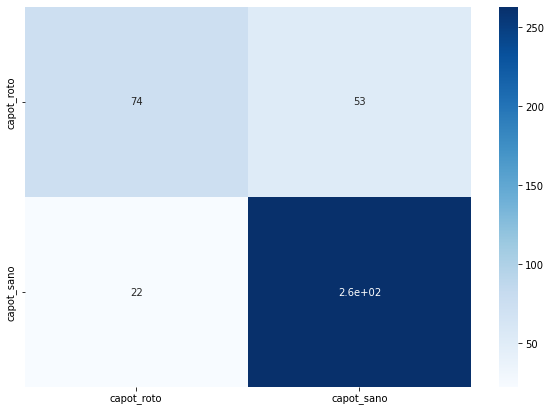

In [4]:
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts_resnet152"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

In [5]:
import importlib
importlib.reload(main)

<module 'main' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/main.py'>

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 71.38%
Class: capot_roto, #470, 28.62%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.6043 Main metric (macro_f1): 0.4181 Time: 9.97s
test Loss: 0.6216 Main metric (macro_f1): 0.4089 Time: 2.32s
Epoch 1/99
----------
train Loss: 0.5881 Main metric (macro_f1): 0.4185 Time: 9.40s
test Loss: 0.6087 Main metric (macro_f1): 0.4089 Time: 2.30s
ES Module Best: 0.6086995231295095, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5704 Main metric (macro_f1): 0.4421 Time: 9.36s
test Loss: 0.5940 Main metric (macro_f1): 0.4256 Time: 2.29s
ES Module Best: 0.5940319907318041, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.5556 Main metric (macro_f1): 0.4653 Time: 9.36s
test Loss: 0.5998 Main metric (macro_f1): 0.4173 Time: 2.31s
ES Module Best: 0.5940319907318041, BadEpochs: 1
Epoch 4/99
----------
train Loss: 0.544

,class,precision,recall,f1
0,capot_roto,0.735294,0.393701,0.512820
1,capot_sano,0.776163,0.936842,0.848967


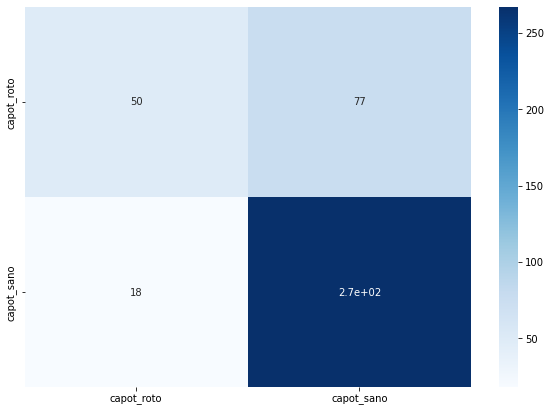

In [6]:
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts_resnet152_fe"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=True,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

In [7]:
import torchvision.models as models
m = models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /clusteruy/home/franco.cuevas/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 71.38%
Class: capot_roto, #470, 28.62%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.6246 Main metric (macro_f1): 0.4646 Time: 7.54s
test Loss: 0.6130 Main metric (macro_f1): 0.4089 Time: 0.97s
Epoch 1/99
----------
train Loss: 0.5937 Main metric (macro_f1): 0.4228 Time: 6.97s
test Loss: 0.5988 Main metric (macro_f1): 0.4173 Time: 0.94s
ES Module Best: 0.5987919968308755, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.5764 Main metric (macro_f1): 0.4210 Time: 7.02s
test Loss: 0.5876 Main metric (macro_f1): 0.4173 Time: 0.95s
ES Module Best: 0.5875740045482672, BadEpochs: 0
Epoch 3/99
----------
train Loss: 0.5648 Main metric (macro_f1): 0.4300 Time: 7.05s
test Loss: 0.5785 Main metric (macro_f1): 0.4256 Time: 1.16s
ES Module Best: 0.5784527613121329, BadEpochs: 0
Epoch 4/99
----------
train Loss: 0.555

,class,precision,recall,f1
0,capot_roto,0.811111,0.574803,0.672811
1,capot_sano,0.832298,0.940351,0.883031


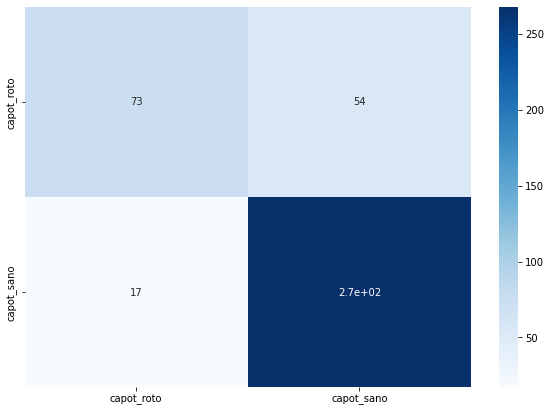

In [10]:
importlib.reload(main)
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts_googlenet"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)

In [11]:
models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /clusteruy/home/franco.cuevas/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

LOAD TRAIN
----- CLASS DISTRIBUTION -----
Class: capot_sano, #1172, 71.38%
Class: capot_roto, #470, 28.62%
LOAD TEST
----- CLASS DISTRIBUTION -----
Class: capot_sano, #285, 69.17%
Class: capot_roto, #127, 30.83%
#TRAIN 1642 #TEST 412
Epoch 0/99
----------
train Loss: 0.6066 Main metric (macro_f1): 0.5188 Time: 17.23s
test Loss: 0.5816 Main metric (macro_f1): 0.4486 Time: 1.77s
Epoch 1/99
----------
train Loss: 0.5509 Main metric (macro_f1): 0.5684 Time: 16.54s
test Loss: 0.5430 Main metric (macro_f1): 0.6092 Time: 1.76s
ES Module Best: 0.5430375994409172, BadEpochs: 0
Epoch 2/99
----------
train Loss: 0.4943 Main metric (macro_f1): 0.6587 Time: 16.52s
test Loss: 0.5931 Main metric (macro_f1): 0.6624 Time: 1.77s
ES Module Best: 0.5430375994409172, BadEpochs: 1
Epoch 3/99
----------
train Loss: 0.4642 Main metric (macro_f1): 0.7077 Time: 16.56s
test Loss: 0.4989 Main metric (macro_f1): 0.6721 Time: 3.38s
ES Module Best: 0.4988623090739389, BadEpochs: 0
Epoch 4/99
----------
train Loss: 0

,class,precision,recall,f1
0,capot_roto,0.697917,0.527559,0.600897
1,capot_sano,0.810127,0.898246,0.851913


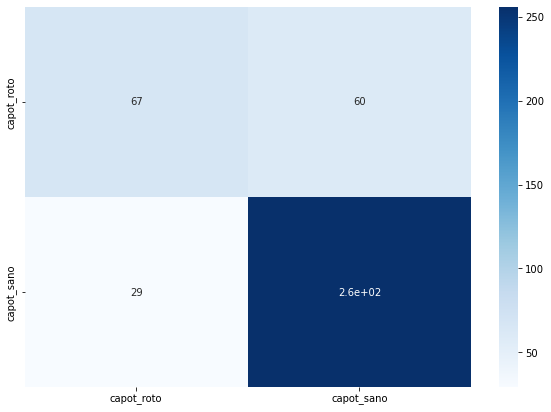

In [12]:
importlib.reload(main)
part = "Capot"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "capot_use-selected-parts_vgg16"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    random_state=42,
    num_epochs=100,
    remove_not_visible=True,
    use_selected_parts=True
)